### ワーク2 : データの把握



In [1]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic']

In [2]:
# データの読み込みと確認
df = pd.read_csv("./data.csv")
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [3]:
df = df.iloc[:,:31]
df.isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
Q25    0
Q26    0
Q27    0
Q28    0
Q29    0
Q30    0
Q31    0
dtype: int64


質問項目は以下の31項目。

Q1. I usually don't laugh or joke around much with other people.

Q2. If I am feeling depressed, I can usually cheer myself up with humor.

Q3. If someone makes a mistake, I will often tease them about it.

Q4. I let people laugh at me or make fun at my expense more than I should.

Q5. I don't have to work very hard at making other people laugh'I seem to be a naturally humorous person.

Q6. Even when I'm by myself, I'm often amused by the absurdities of life.

Q7. People are never offended or hurt by my sense of humor.

Q8. I will often get carried away in putting myself down if it makes my family or friends laugh.

Q9. I rarely make other people laugh by telling funny stories about myself.

Q10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.

Q11. When telling jokes or saying funny things, I am usually not very concerned about how other people are taking it.

Q12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.

Q13. I laugh and joke a lot with my closest friends.

Q14. My humorous outlook on life keeps me from getting overly upset or depressed about things.

Q15. I do not like it when people use humor as a way of criticizing or putting someone down.

Q16. I don't often say funny things to put myself down.

Q17. I usually don't like to tell jokes or amuse people.

Q18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.

Q19. Sometimes I think of something that is so funny that I can�t stop myself from saying it, even if it is not appropriate for the situation.

Q20. I often go overboard in putting myself down when I am making jokes or trying to be funny.

Q21. I enjoy making people laugh.

Q22. If I am feeling sad or upset, I usually lose my sense of humor.

Q23. I never participate in laughing at others even if all my friends are doing it.

Q24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.

Q25. I don't often joke around with my friends.

Q26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.

Q27. If I don't like someone, I often use humor or teasing to put them down.

Q28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.

Q29. I usually can't think of witty things to say when I'm with other people.

Q30. I don't need to be with other people to feel amused I can usually find things to laugh about even when I'm by myself.

Q31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.



質問への回答は以下の5段階の内から選択する。

1. 当てはまらない
2. あまり当てはまらない
3. 時々当てはまる
4. 当てはまる
5. とても当てはまる

<div style="page-break-after: always;"></div>

###  因子数の決定

In [4]:
# 回転を行わない因子分析モデルによる因子負荷量の推定
from factor_analyzer import FactorAnalyzer
n_var = len(df.columns)
fa = FactorAnalyzer(n_factors=n_var,rotation=None)
fa.fit(df)

FactorAnalyzer(n_factors=31, rotation=None, rotation_kwargs={})

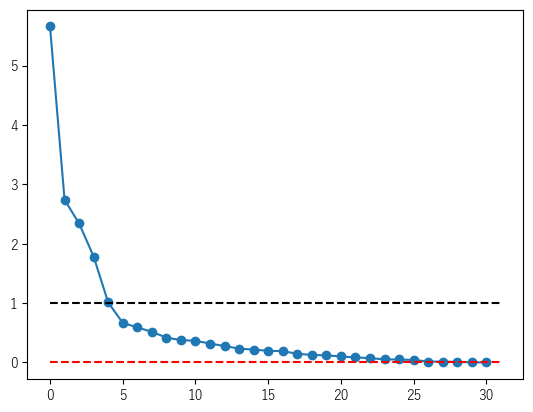

In [5]:
# スクリープロットの描画
plt.plot(fa.get_eigenvalues()[1],marker="o")
plt.hlines(0,0,n_var,linestyles="--", color="red")
plt.hlines(1,0,n_var,linestyles="--", color="black")
plt.show()

the slope of the graph will slightly reduce after 5th position and also the value is getting lower than one Therefore I select the number of factor(因子数) as 5


In [6]:
# 因子数の決定
n_fact = 5

###  回転方法の決定

In [7]:
# 複数の回転による因子負荷量絶対値の取得
models = {}
loadings_abs_s = {}
rotations = ["varimax","promax"]# ここを実装する
for rot in rotations:
    fa = FactorAnalyzer(n_factors=n_fact, rotation=rot)# ここを実装する
    fa.fit(df) # ここを実装する
    models[rot] = fa
    loadings_abs_s[rot] = np.abs(fa.loadings_)# ここを実装する

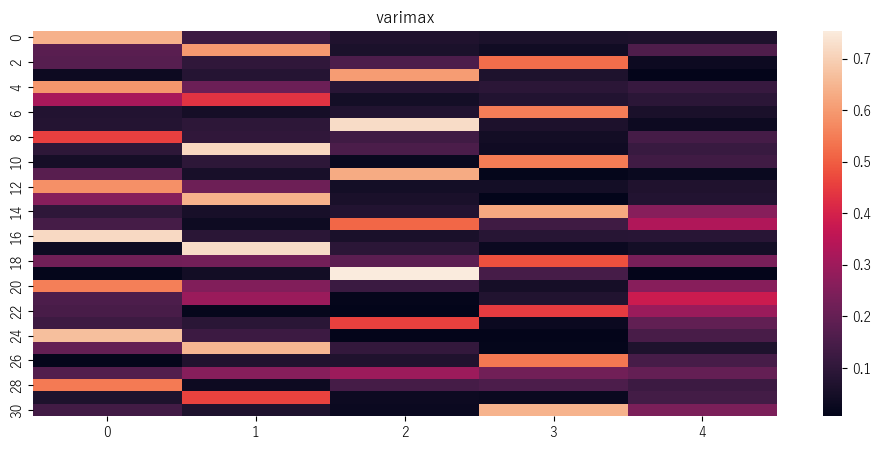

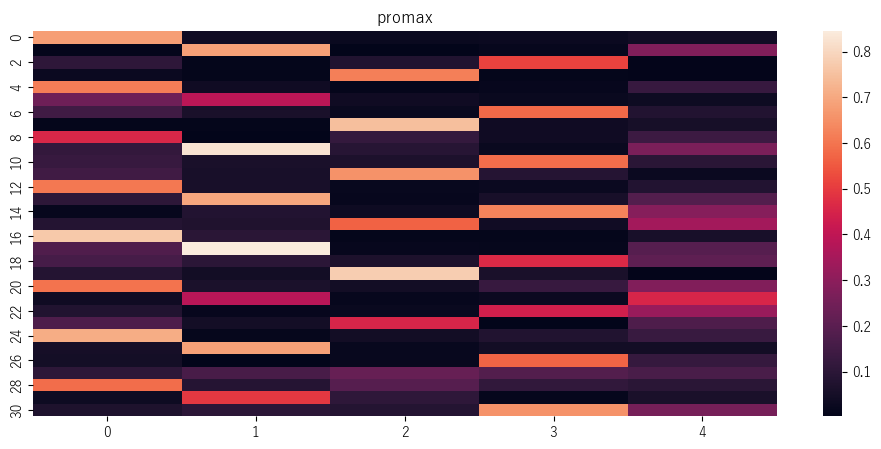

In [8]:
# 各回転の因子負荷量絶対値のヒートマップの描画
for rot in rotations:
    plt.figure(figsize=(12,5))
    sns.heatmap(loadings_abs_s[rot])
    plt.title(rot)
    plt.show()

If you look at the results of varimax, promax,
I select promax because Promax shows strong relationship between factors and variables

In [9]:
# 回転方法の決定
rot =  "promax"
fa = models[rot]
loadings_abs = loadings_abs_s[rot]

###  観測変数の取捨選択

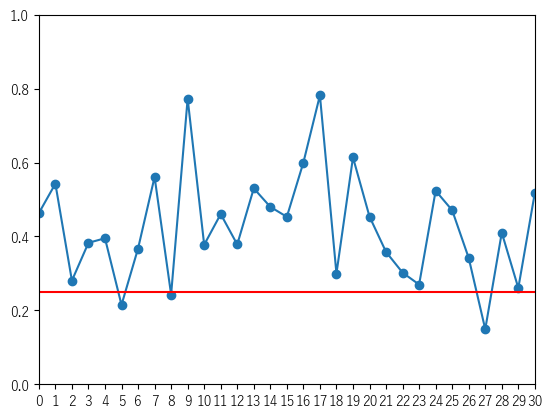

In [10]:
# 共通性の確認
commu_line = 0.5**2
commu_promax = fa.get_communalities()
plt.plot(commu_promax, marker="o") 
plt.xlim(xmin=0, xmax=n_var-1)
plt.ylim(ymin=0, ymax=1)
plt.xticks(np.arange(n_var))
plt.hlines(commu_line,0,n_var,"r")
plt.show()

In [11]:
# 各観測変数で因子負荷量が基準値を超える数の確認
load_line = 0.5 
load_above = fa.get_communalities()

# Count the number of factor loadings above the threshold
n_load_above = sum(load > load_line for load in load_above)

print("Number of factor loadings above the threshold:", n_load_above)

Number of factor loadings above the threshold: 9


各観測変数の共通性は0.5ため、9と言える。  

今回は、0.5ため9。

<div style="page-break-after: always;"></div>

###  因子負荷量の基準値の決定

In [12]:
# 因子負荷量の取得とデータフレーム型への格納
colnames = [f"fact{i}" for i in range(n_fact)]
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=colnames)
loadings

,fact0,fact1,fact2,fact3,fact4
Q1,0.677369,0.037043,-0.022737,-0.025560,0.040968
Q2,-0.009393,0.682098,0.002697,0.015884,-0.277694
Q3,-0.105992,0.011391,0.075959,-0.513084,0.007846
Q4,0.028263,0.011738,0.617803,0.009188,-0.006491
Q5,-0.614208,0.036702,0.011489,-0.016446,0.126815
Q6,-0.241929,0.391157,-0.038612,-0.025445,0.033746
Q7,-0.145393,0.061288,-0.022940,0.579074,0.080511
Q8,-0.009154,0.011917,0.746069,0.035918,-0.053014
Q9,0.457473,-0.002532,-0.117707,-0.036754,0.135558
Q10,0.117433,0.824852,0.088709,0.023160,-0.265092


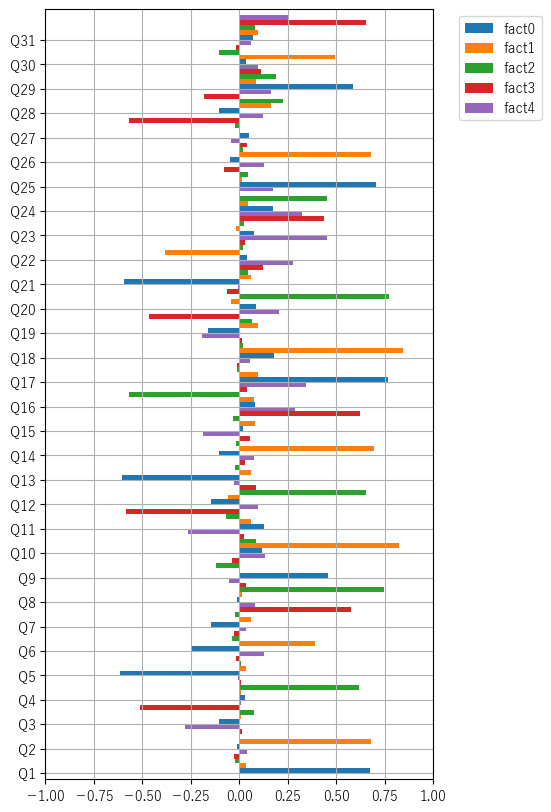

In [16]:
# 観測変数ごとの因子負荷量の棒グラフの描画
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

loadings.plot.barh(width=1, align="edge", ax=ax)
# loadings["因子0"].plot.barh(ax=ax) # 特定の因子だけを表示する際はこちらを使う

ref =0.4

ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlim(xmin=-1, xmax=1)
ax.grid()
plt.show()

因子負荷量の基準値は0.4と設定した。

### 因子への命名

In [18]:
# 因子ごとに因子負荷量が基準値を上回る観測変数を表示
for i in range(n_fact):
    fact_num = f"fact{i}"
    sig_var = loadings.query(f"{fact_num}.abs() >= {ref}")[fact_num]# ここを実装する
    print(sig_var)

Q1     0.677369
Q5    -0.614208
Q9     0.457473
Q13   -0.606159
Q17    0.766605
Q21   -0.595836
Q25    0.706254
Q29    0.586855
Name: fact0, dtype: float64
Q2     0.682098
Q10    0.824852
Q14    0.693506
Q18    0.844255
Q26    0.681299
Q30    0.493917
Name: fact1, dtype: float64
Q4     0.617803
Q8     0.746069
Q12    0.654089
Q16   -0.567370
Q20    0.775277
Q24    0.454492
Name: fact2, dtype: float64
Q3    -0.513084
Q7     0.579074
Q11   -0.586525
Q15    0.624711
Q19   -0.465554
Q23    0.437599
Q27   -0.569437
Q31    0.655513
Name: fact3, dtype: float64
Q22    0.455349
Name: fact4, dtype: float64


第1因子は Pragmatic。  
第2因子は self-Remedial Humorist。  
第3因子は Self-Deprecating Humor Enthusiast。  
第4因子は Respectful Comedian。 
第5因子は Humor Impaired 
以上から、因子名を以下のように命名する。

* 第1因子 : Pragmatic
* 第2因子 : self-Remedial Humorist
* 第3因子 : Self-Deprecating Humor Enthusiast
* 第4因子 : Respectful Comedian
* 第5因子 : Humor Impaired


In [101]:
# 因子への命名
fact_names = ["Pragmatic","self-Remedial Humorist","Self-Deprecating Humor Enthusiast","Respectful Comedian","Humor Impaired"]

###  因子得点の推定をする関数の定義

In [85]:
questions = [
    "Q1 . I usually don't laugh or joke around much with other people.",
    "Q2 . If I am feeling depressed, I can usually cheer myself up with humor.",
    "Q3 . If someone makes a mistake, I will often tease them about it.",
    "Q4 . I let people laugh at me or make fun at my expense more than I should.",
    "Q5 . I don't have to work very hard at making other people laugh—I seem to be a naturally humorous person.",
    "Q6 . Even when I'm by myself, I'm often amused by the absurdities of life.",
    "Q7 . People are never offended or hurt by my sense of humor.",
    "Q8 . I will often get carried away in putting myself down if it makes my family or friends laugh.",
    "Q9 . I rarely make other people laugh by telling funny stories about myself.",
    "Q10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.",
    "Q11. When telling jokes or saying funny things, I am usually not very concerned about how other people are taking it.",
    "Q12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.",
    "Q13. I laugh and joke a lot with my closest friends.",
    "Q14. My humorous outlook on life keeps me from getting overly upset or depressed about things.",
    "Q15. I do not like it when people use humor as a way of criticizing or putting someone down.",
    "Q16. I don't often say funny things to put myself down.",
    "Q17. I usually don't like to tell jokes or amuse people.",
    "Q18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.",
    "Q19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.",
    "Q20. I often go overboard in putting myself down when I am making jokes or trying to be funny.",
    "Q21. I enjoy making people laugh.",
    "Q22. If I am feeling sad or upset, I usually lose my sense of humor.",
    "Q23. I never participate in laughing at others even if all my friends are doing it.",
    "Q24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.",
    "Q25. I don't often joke around with my friends.",
    "Q26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.",
    "Q27. If I don't like someone, I often use humor or teasing to put them down.",
    "Q28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.",
    "Q29. I usually can't think of witty things to say when I'm with other people.",
    "Q30. I don't need to be with other people to feel amused—I can usually find things to laugh about even when I'm by myself.",
    "Q31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.",
]
# questions = [
#     "Q1. I usually don't laugh or joke around much with other people.",
#     "Q2. If I am feeling depressed, I can usually cheer myself up with humor.",
#     "Q3. If someone makes a mistake, I will often tease them about it.",
#     "Q4. I let people laugh at me or make fun at my expense more than I should.",
#     "Q5. I don't have to work very hard at making other people laugh—I seem to be a naturally humorous person."    
# ]



In [2]:
import streamlit as st
import pandas as pd
from sklearn.decomposition import FactorAnalysis


def analyze(questions, fact_names):
    answer = {}
    grade = "\n1:当てはまらない\n2:あまり当てはまらない\n3:時々当てはまる,\n4:当てはまる\n5:とても当てはまる"
    for q in questions:
        a = st.number_input(q+grade, min_value=1, max_value=5, step=1)
        answer[q[:3]] = [a]

    answer = pd.DataFrame(answer)
    fa = FactorAnalysis(n_components=len(fact_names), random_state=42)
    fa.fit(answer)
    score = fa.transform(answer)
    score = pd.DataFrame(score)
    score.columns = fact_names

    return score

# Streamlit UI
st.title("Factor Analysis App")

# Run the analysis when the button is clicked
if st.button("Run Analysis"):
    score = analyze(questions, fact_names)
    st.write("Factor Scores:")
    st.write(score)


In [102]:
# # 関数の定義
# def analyze():
#     answer = {}
#     grade = "\n1:当てはまらない\n2:あまり当てはまらない\n3:時々当てはまる,\n4:当てはまる\n5:とても当てはまる"
#     for q in questions:
#         a = input(q+grade)
#         a = int(a)
#         answer[q[:3]] = [a]

#     answer = pd.DataFrame(answer)
#     score = fa.transform(answer)
#     score = pd.DataFrame(score)
#     score.columns = fact_names

#     return score

In [4]:
# 関数の動作確認
analyze(questions,fact_names)

C:\Users\kim\miniconda3\envs\ztm\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:283: RuntimeWarning: divide by zero encountered in log
  ll = llconst + np.sum(np.log(s))
C:\Users\kim\miniconda3\envs\ztm\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:287: RuntimeWarning: invalid value encountered in scalar subtract
  if (ll - old_ll) < self.tol:
C:\Users\kim\miniconda3\envs\ztm\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:293: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

### モデルのファイルへの保存

In [104]:
import pickle

with open("fa_model.pkl", "wb") as f:
    pickle.dump(fa, f)